In [9]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

%matplotlib inline

In [10]:
%run 'CNNBlocks.ipynb'
%run 'modelArchitecture.ipynb'
%run 'batchGenerator.ipynb'

In [11]:
model = compileModel((1,64,64,64),1e-4)

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(8, (3, 3, 3), kernel_regularizer=<keras.reg..., padding="same", data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `AveragePooling3D` call to the Keras 2 API: `AveragePooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/opt/anaconda/lib/python3.5/site-packages/keras/legacy/layers.py:456: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras

Compiling model...


/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_regularizer=<keras.reg..., name="Lobulation", activation="sigmoid")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_regularizer=<keras.reg..., name="Spiculation", activation="sigmoid")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


In [ ]:
def train_model_on_stage(model, modelPath, testSize=0.2, batchSize=10):
    
    print ('Loading positive patches')
    xPos, ixPos = loadCategory('true')
    xPosTrain,xPosValid,ixPosTrain,ixPosValid = train_test_split(xPos, ixPos, test_size=testSize)   
    del xPos, ixPos
    
    print ('Loading negative patches')
    xNeg, ixNeg = loadCategory('random')
    xNegTrain,xNegValid,ixNegTrain,ixNegValid = train_test_split(xNeg, ixNeg, test_size=testSize)
    del xNeg, ixNeg
    
    print ('Loading false positive patches')
    xFP, ixFP = loadCategory('false')
    xFPTrain,xFPValid,ixFPTrain,ixFPValid = train_test_split(xFP, ixFP, test_size=testSize)
    del xFP, ixFP

    trainGenerator = batchGenerator(xPosTrain,xNegTrain,xFPTrain,
                                        ixPosTrain,ixNegTrain,ixFPTrain,
                                        batchSize=batch_size,
                                        posFraction=.5)
    
    validGenerator = batchGenerator(xPosValid,xNegValid,xFPValid,
                                     ixPosValid,ixNegValid,ixFPValid,
                                     batchSize=batch_size,
                                     posFraction=.5)

    ckp = ModelCheckpoint(filepath=modelPath)
    
    nbEpoch = 1
    stepsPerEpoch = 2
        
#     lossHist = {}
    
#     for lossType in ['loss','val_loss']:
#         lossHist[lossType] = []
    
    for epoch in range(nbEpoch):
        hist = model.fit_generator(trainGenerator, validation_data=validGenerator, 
                                   validation_steps=1,steps_per_epoch=stepsPerEpoch,
                                   nb_epoch=epoch+1,callbacks=[ckp],
                                   initial_epoch=epoch)
        
#         for lossType in ['loss','val_loss']:
#             lossHist[lossType].extend(hist.history[lossType])

    return model, hist

In [ ]:
# model_64.load_weights('/home/katya/LungCancer/Katya/CNN_v1/model_v1_weights_temp64.h5')
modelPath = '/home/katya/LungCancer/Katya/CNN_v2/model_and_weights/LUNA_model_v2.h5'
model, lossHist = train_model_on_stage(model, modelPath, batchSize=30)
# model_64.save_weights('/home/katya/LungCancer/Katya/CNN_v2/model_and_weights/model_v1_weights_temp64.h5')

Loading positive patches
Loading negative patches


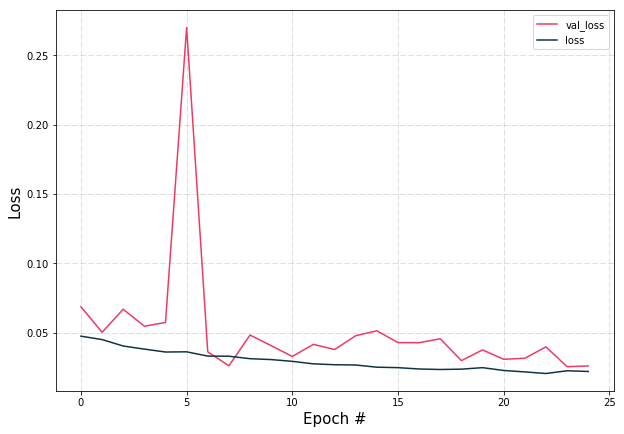

In [36]:
plt.figure(figsize=[10,7])
plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Epoch #', fontsize=15)
plt.ylabel('Loss', fontsize=15)

colors = ['#F03861','#0D3446']

labels=list(lossHist.keys())

for i,key in enumerate(lossHist):
    plt.plot([x for x in range(25)], lossHist[key], '-', color=colors[i], label=labels[i])
    plt.legend()
    
plt.savefig('/home/katya/LungCancer/Katya/CNN_v2/figures/3.png')

In [37]:
lossHist

{'loss': [0.047433477727075415,
  0.044984765878568096,
  0.040337754475573702,
  0.03810550731917222,
  0.036011007154981296,
  0.036158236494908728,
  0.03306106706460317,
  0.0329821704265972,
  0.0311923700508972,
  0.030556592606008053,
  0.029285872721423706,
  0.027476609852164983,
  0.026850875839591025,
  0.026649612461527188,
  0.025066080391407012,
  0.024734016650666792,
  0.023778785560280083,
  0.023410216321547828,
  0.023650254998356105,
  0.024728710173318784,
  0.022698128738751013,
  0.02166529779943327,
  0.020512945186346769,
  0.02248792743931214,
  0.021987915725136798],
 'val_loss': [0.068684428930282593,
  0.050242267549037933,
  0.066862069070339203,
  0.054628130048513412,
  0.057308338582515717,
  0.27000811696052551,
  0.036130350083112717,
  0.02608959749341011,
  0.048244640231132507,
  0.040582481771707535,
  0.032795865088701248,
  0.041514098644256592,
  0.037816092371940613,
  0.047749005258083344,
  0.051337014883756638,
  0.042785957455635071,
  0.0